# II. Xây dựng mô hình

In [1]:
# Các thư viện thuật toán phân nhóm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import collections


# Các thư viện khác
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from sklearn import  model_selection
import time
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import norm
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## 1. Đọc dữ liệu

In [2]:
df = pd.read_csv(r'D:\An\School\PTDLTTC\DE TAI 1/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Thống kê dữ liệu

In [3]:
# xem thông tin mô tả của dữ liệu
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Nhận xét về tập dữ liệu:  
+ Bộ dữ liệu thu thập được ngoài cột "amount" và "class", chúng ta không biết các cột khác có ý nghĩa là gì, vì tính chất riêng tư của dữ liệu nên ta chỉ biết những cột đó đã được giảm chiều dữ liệu bằng phương pháp giảm chiều dữ liệu như PCA.  
+ Tổng số giao dịch của tập dữ liệu là 284807 giao dịch.  
+ Số tiền giao dịch tương đối nhỏ. Giá trị tiền trung bình của các giao dịch là khoảng 88 USD. Điều này cũng dễ giải thích, bởi các giao dịch được thu thập chỉ trong 2 ngày. 


In [4]:
# Kiểm tra các thuộc tính
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Đếm số lượng giao dịch cho mỗi nhãn
print('Giao dịch bình thường chiếm ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% trong bộ dữ liệu')
print('Giao dịch lừa đảo chiếm ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% trong bộ dữ liệu')

Giao dịch bình thường chiếm  99.83 % trong bộ dữ liệu
Giao dịch lừa đảo chiếm  0.17 % trong bộ dữ liệu


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

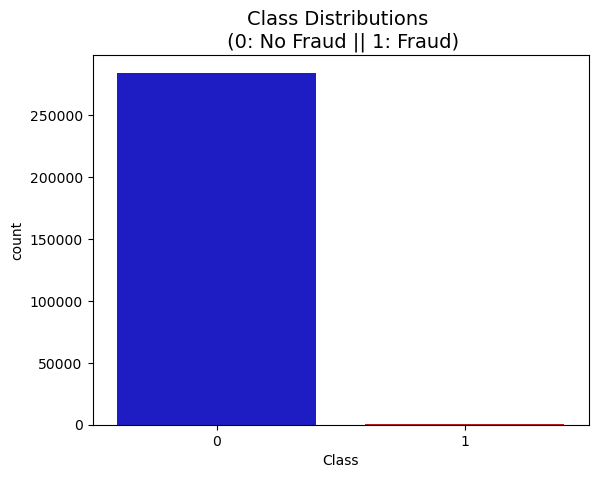

In [6]:
# trực quan số lượng giao dịch gian lận và không gian lận
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Nhận xét: Tỷ lệ giao dịch gian lận là 0.17% và tỷ lệ giao dịch bình thường là 99.83%, ta có thể dễ dàng nhận thấy là tập dữ liệu này đang bị mất cân bằng. Hầu hết các giao dịch của bộ dữ liệu đều không gian lận.  
Nếu chúng ta sử dụng bộ dữ liệu này làm cơ sở cho các mô hình dự đoán và phân tích thì có thể gặp nhiều lỗi và thuật toán của chúng ta dễ mắc phải lỗi quá khớp bởi sẽ có xu hướng dự đoán rằng "hầu hết các giao dịch không phải là gian lận" do tỉ lệ giao dịch gian lận chiến phẩm trăm quá nhỏ, dẫn dến xác suất để phát hiện ra gian lận cũng rất nhỏ.  
=> Vì vậy, để có thể xây dựng được mô hình phát hiện các mẫu có dấu hiệu gian lận chúng ta sẽ tiến hành cân bằng tập dữ liệu theo thuật toán Random UnderSampling và Random OverSampling.

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

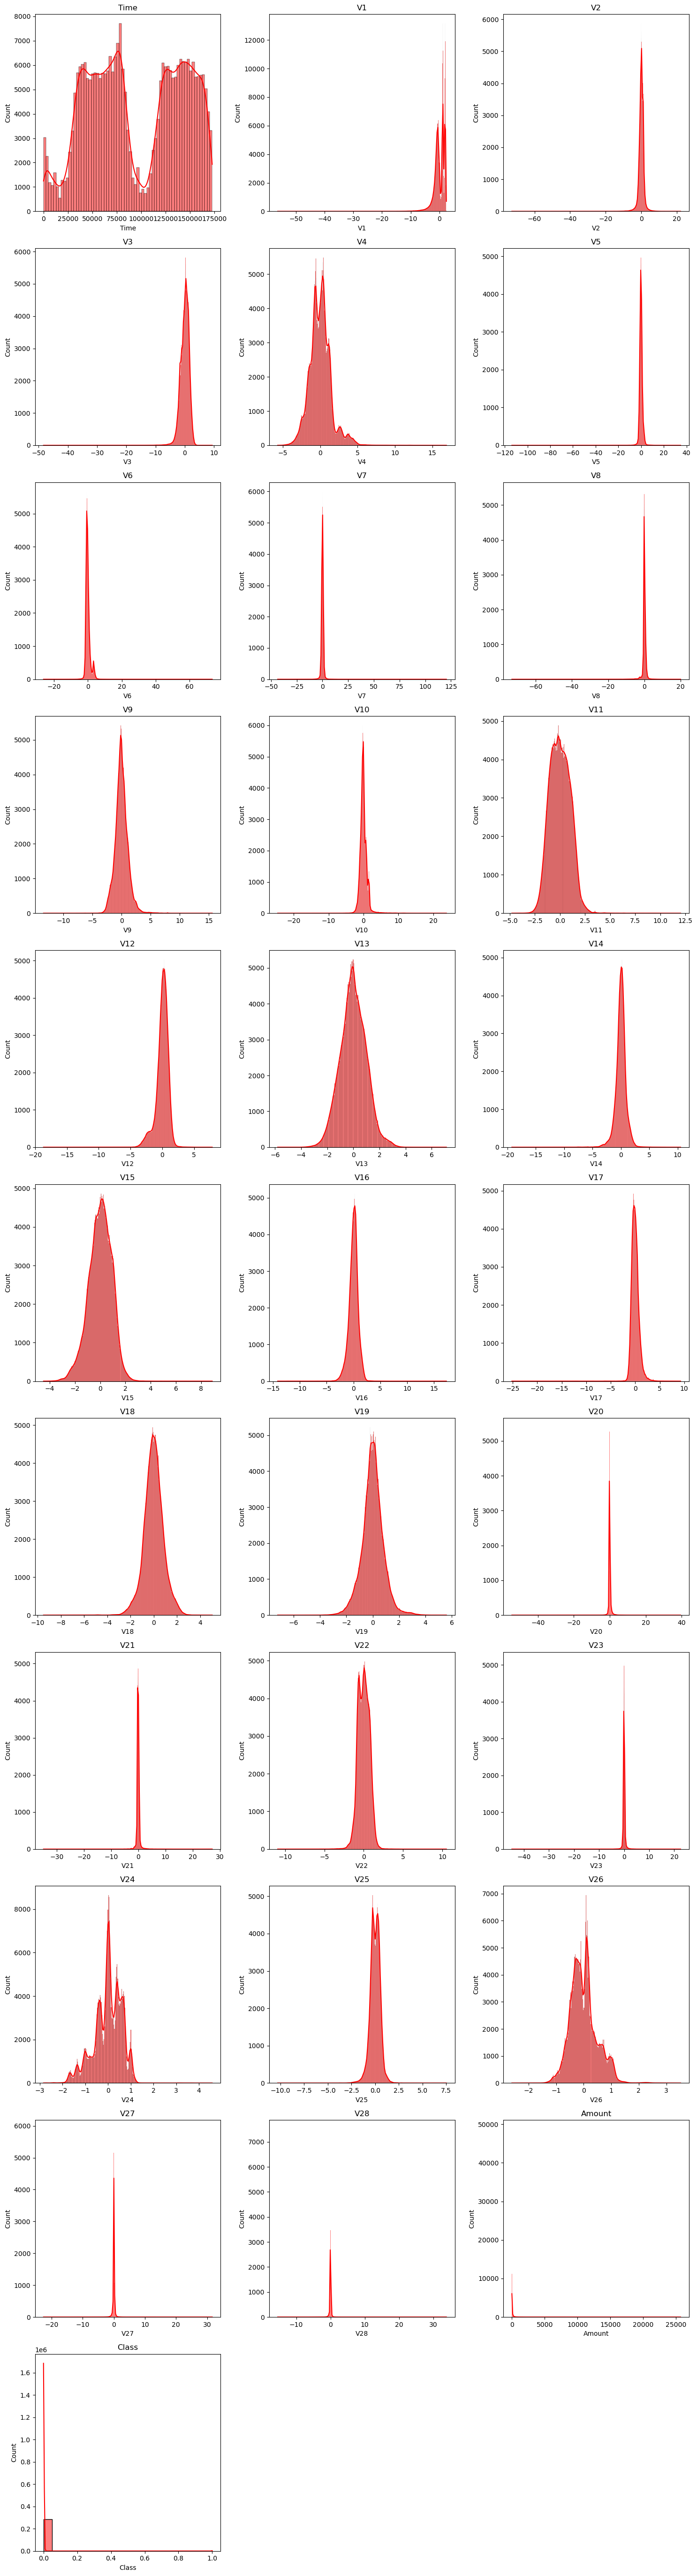

In [8]:
# Lấy tên của tất cả các thuộc tính
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

# Tính số hàng và số cột của subplots
num_cols=len(int_vars)
num_rows = (num_cols+2)//3  # mỗi hàng có 3 cột

# Tạo figure cho sublots 
fig, axs = plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

# Tạo histogram cho từng thuộc tính
for i, var in enumerate(int_vars):
    if i< num_cols:
        sns.histplot(data=df,x=var, ax=axs[i], color='r',kde=True)
        axs[i].set_title(var)

# Điều chỉnh khoảng cách giữa các subplots
fig.tight_layout()

# Bỏ các sublots rỗng nếu cần
if num_cols < len (axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])

# Hiện biểu đồ
plt.show()


Các biểu đồ thể hiện sự phân bố dữ liệu của các đặc trưng trong tập dữ liệu. Đối với một số đặc trưng ta thấy có sự phân bố dữ liệu khá tốt - đó được coi là các đặc trưng có tính chọn lọc tốt về mặt phân bố. Các đặc trưng có sự phân bố tốt được nhận thấy như là V4, V11, V12, V14,V16, V18. Các đặc trưng còn lại thì có cấu hình khá khác biệt. Tuy nhiên, các biểu đồ này chỉ có chúng ta thấy được sự phân bố của dữ liệu như thế nào, chứ chưa có ý nghĩa quyết định trong việc chọn lọc thuộc tính.

## 3. Tiền xử lý dữ liệu

In [9]:
# Kiểm tra các giá trị Null
df.isnull().sum().max()

0

Không có giá trị "Null" xuất hiện trong tập dữ liệu, nên không cần phải tìm cách thay thế các giá trị null.

### 3.1. Scaling dữ liệu, mã hóa các cột amount, time

In [10]:
# Sử dụng RobustScaler để dữ liệu ít có ngoại lai hơn
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount và Time đã được Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### 3.2. Xử lý mẫu mất cân bằng với kỹ thuật lấy mẫu Random UnderSampling

Tại sao cần phải xử lý mẫu mất cân bằng?  
Việc sử dụng tập dữ liệu gốc bị mất cân bằng nặng sẽ gây ra các vấn đề sau:  
+ Overfitting: Các mô hình phân loại sẽ có xu hướng phân loại hầu hết các trường hợp là không gian lận. Tuy nhiên, chúng ta mong muốn mô hình sẽ nhận biết được khi có các trường hợp gian lận xảy ra.  
+ Wrong Corelations: Chúng ta không biết các đặc trưng "V1-V28" đại diện cho điều gì, nếu biết được thì sẽ hữu ích để hiểu được mỗi đặc trưng sẽ ảnh hưởng như thế nào tới nhãn phân loại "Gian lận" hay "Không gian lận"; việc có một tập dữ liệu mất cân bằng khiến chúng ta không thể thấy được mối tương quan thực sự giữa nhãn phân loại và các đặc trưng.  

In [11]:
X = df[df.columns.drop('Class')]
y = df['Class']

### Random Undersampling

Thực hiện Random Under-Sampling đơn giản là làm giảm bớt dữ liệu để có tập dữ liệu cân bằng hơn và để tránh mô hình bị overfitting.  
Các bước thực hiện:  
+ Đầu tiên, xác định lớp nhãn mất cân bằng như thế nào, chênh lệch bao nhiêu, sử dụng "value_counts()" để xác định số lượng mỗi nhãn  
+ Sau khi xác định được số lượng nhãn "Không gian lận" (Fraud=1), chúng ta lấy số lượng giao dịch không gian lận sao cho bằng với số lượng giao dịch gian lận.  
+ Sau đó chúng ta thu được một mẫu phụ của bộ dữ liệu với tỷ lệ nhãn 50/50. Tiếp theo, sẽ triển khai xáo trộn dữ liệu xem các mô hình có thể duy trì độ chính xác nhất định mỗi khi chạy tập lệnh này không.  
=> Lưu ý: Rủi ro của kỹ thuật này với mô hình phân loại là hiệu suất sẽ không được chính xác như chúng ta muốn, vì một lượng lớn dữ liệu mất đi (lấy 492 giao dịch không gian lận từ 284315 giao dịch không gian lận). 

In [12]:
rus = RandomUnderSampler(random_state=606)
X_rus, y_rus = rus.fit_resample(X, y)

new_df = X_rus.copy()
new_df['Class'] = y_rus.loc[X_rus.index]

# Tỷ lệ hai loại giao dịch sau khi cân bằng
print('Tỷ lệ các lớp trong bộ dữ liệu đã được xử lý:')
print(new_df['Class'].value_counts()/len(new_df))

Tỷ lệ các lớp trong bộ dữ liệu đã được xử lý:
0    0.5
1    0.5
Name: Class, dtype: float64


In [13]:
new_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.282540,0.027033,-0.739167,1.488279,-0.859727,-0.929626,1.225151,-0.504375,0.997946,-0.193943,...,0.068869,-0.268908,-0.776601,0.083308,-0.087346,-0.942783,0.009797,-0.038153,0.389898,0
1,1.198491,-0.186880,-2.291870,-0.222693,2.019713,0.834219,0.007270,-0.126386,-0.095041,0.542176,...,-0.020731,0.175924,0.222475,-0.062408,-0.039041,0.411421,0.931766,-0.235431,-0.055730,0
2,-0.139733,-0.397021,1.623488,-0.726126,-0.498823,-1.543105,-0.627058,-0.848995,-0.397324,-0.425423,...,-0.256221,-0.217154,-0.165167,-0.195344,-0.417516,0.827869,-0.034659,0.002616,-0.000007,0
3,1.720394,0.452355,1.862448,-1.662344,-0.494652,-0.795631,-1.099814,0.663760,-1.281894,0.269525,...,0.258426,0.047800,-0.025188,0.163265,0.196552,-0.395267,-0.400485,0.002297,-0.025280,0
4,-0.296653,0.625560,-2.848811,2.927156,-2.616279,-1.515805,0.112150,-1.244598,0.308329,0.019736,...,0.151465,0.945935,0.501926,0.071920,-0.485071,0.025521,0.090622,0.234776,0.240161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,5.142178,0.992140,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
980,-0.296793,0.994549,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
981,0.780968,0.994596,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
982,3.116048,1.001821,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


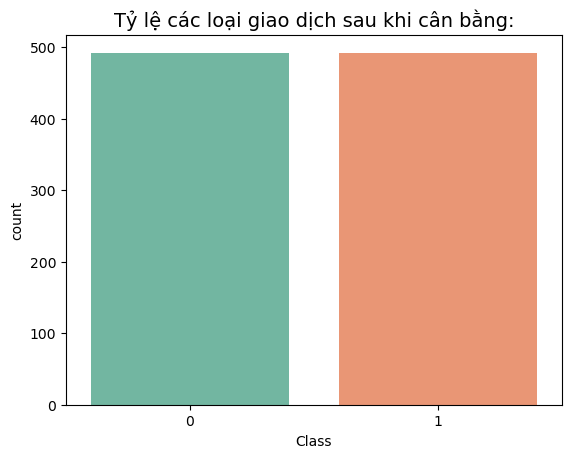

In [14]:
# Trực quan
sns.countplot(x='Class',data = new_df, palette='Set2')
plt.title('Tỷ lệ các loại giao dịch sau khi cân bằng:', fontsize=14)
plt.show()

Tỷ lệ giữa giao dịch lừa đảo và giao dịch bình thường được cân bằng là 1:1 so với ban đầu tỷ lệ xấp xỉ là 17:10000. Biểu đồ thể hiện số lượng mẫu giữa hai lớp được cân bằng bằng kỹ thuật Random UnderSampling.

### 3.3. Xem tương quan và lựa chọn đặc trưng

In [15]:
# tạo hàm trực quan ma trận hiệp phương sai
def corr_chart(df):
    f = plt.subplots( figsize=(18,10))
    sub_sample_corr = df.corr()
    sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
    plt.title('Correlation Matrix \n (bộ dữ liệu sau khi cân bằng)', fontsize=14)
    plt.show()
    return sub_sample_corr['Class'].drop('Class')

# Tạo hàm chọn thuộc tính với hiệp phương sai của thuộc tính đó và thuộc tính Class là Cov, với |Cov| >0.5
def choose_features(df):
    sub_sample_corr = df.corr()
    features=list(sub_sample_corr[sub_sample_corr['Class'].abs() > 0.55]['Class'].drop('Class').index)
    return features

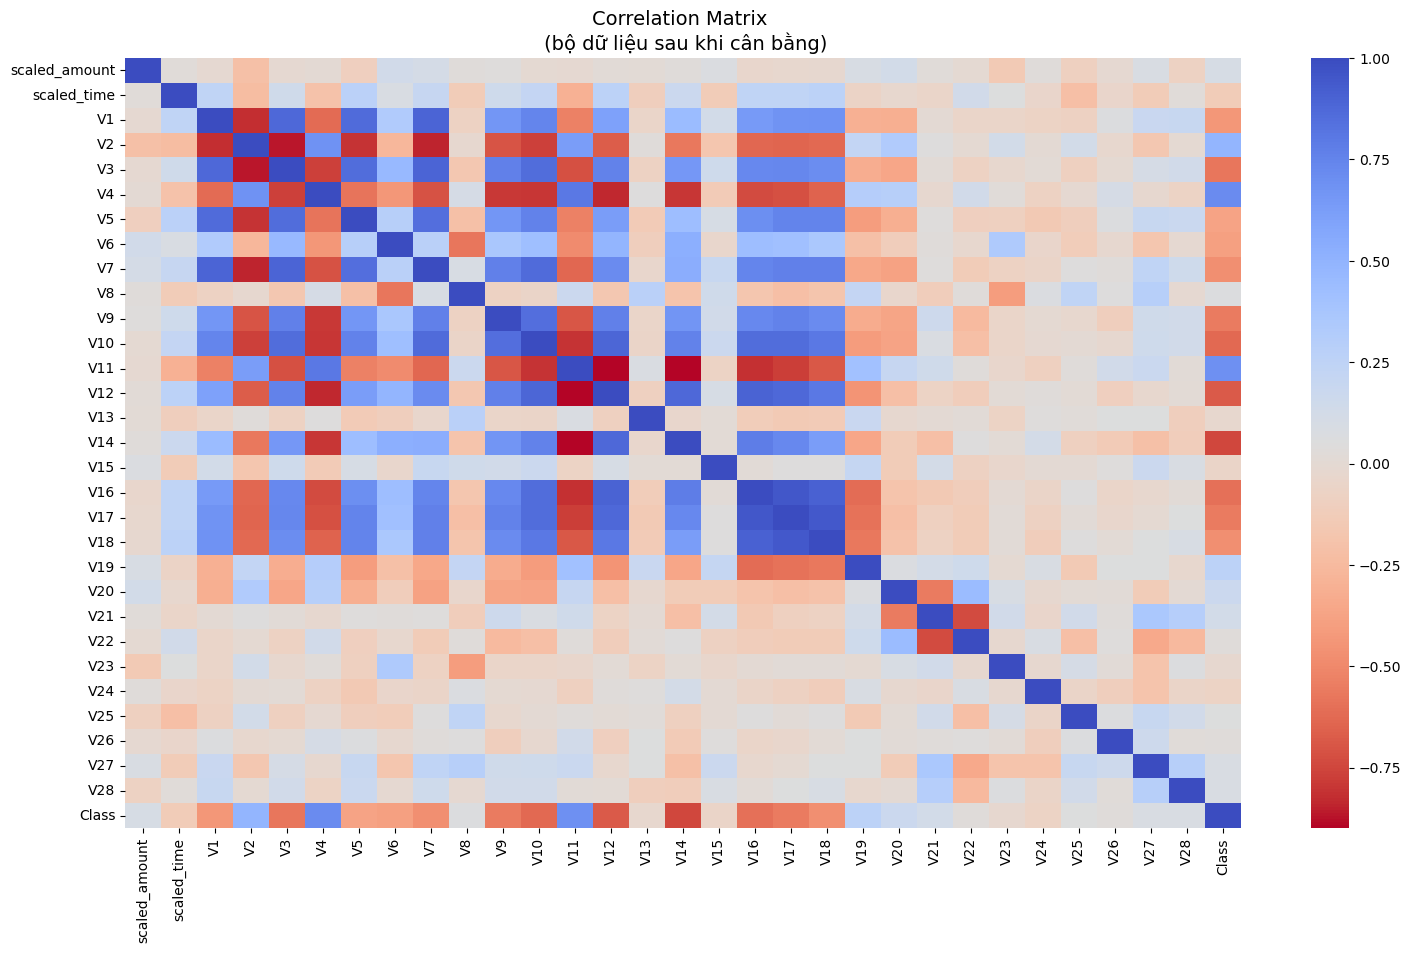

scaled_amount    0.099367
scaled_time     -0.134336
V1              -0.438835
V2               0.493744
V3              -0.573237
V4               0.715003
V5              -0.377820
V6              -0.387949
V7              -0.474815
V8               0.059978
V9              -0.554535
V10             -0.631627
V11              0.690848
V12             -0.679049
V13             -0.028461
V14             -0.747814
V15             -0.053582
V16             -0.596899
V17             -0.556798
V18             -0.473413
V19              0.265591
V20              0.171345
V21              0.129818
V22              0.029913
V23             -0.018968
V24             -0.071378
V25              0.054194
V26              0.029559
V27              0.084460
V28              0.081744
Name: Class, dtype: float64

In [16]:
# Xem tương quan
under_corr=corr_chart(new_df)
under_corr

In [17]:
# Chọn thuộc tính
under_features=choose_features(new_df)
under_features

['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

Dựa vào ma trận tương quan, chúng ta biết được mức độ ảnh hưởng của các đặc trưng tới việc một giao dịch có là gian lận không. Tuy nhiên, việc sử dụng đúng mẫu dữ liệu là rất quan trọng - chúng ta sẽ sử dụng mẫu con đã được lấy. Các đặc trưng có tương quan dương và tương quan âm cao liên quan đến việc xuất hiện các giao dịch gian lận.  
=> Với bài này, các đặc trưng có giá trị tuyệt đối độ tương quan > 0.55 sẽ được lấy. Có 9 đặc trưng:V3, V4, V9, V10, V11, V12, V14, V16, V17.

### 3.4. Interquartile Range (IQR)

Chúng ta sẽ sử dụng biểu đồ boxplot để hiểu tốt hơn về sự phân bố của các đặc trưng vừa lựa chọn trong các giao dịch gian lận và không gian lận.  
*Phương pháp IQR*  
+  Khoảng tứ phân vị (IQR):là khoảng giữa tứ phân vị thứ 1 và tứ phân vị thứ 3.  
+ Thông thường, các giá trị quan sát nằm dưới (Q1 - 1.5IQR) hoặc trên (Q3+1.5IQR) là các giá trị ngoại lai. Nếu thay đổi ngưỡng thì sẽ thay đổi việc phát hiện được ít hay nhiều ngoại lệ.  

=> Ngưỡng càng thấp thì loại bỏ càng nhiều ngoại lệ, để tránh gặp rủi ro mất thông tin, nhóm chúng em sẽ tập trung vào loại bỏ "các ngoại lệ cực đoan".  


In [18]:
# Viết hàm vẽ boxplot cho các thuộc tính đã chọn
def boxplt(df,features):
    # Lấy tên của tất cả các thuộc tính
    int_vars = features

    # Tính số hàng và số cột của
    num_cols=len(int_vars)
    num_rows = (num_cols+2)//3  # mỗi hàng có 3 cột

    # Tạo figure cho sublots 
    fig, axs = plt.subplots(nrows=num_rows,ncols=3,figsize=(10,4*num_rows))
    axs=axs.flatten()

    # Tạo boxplot cho từng thuộc tính
    for i, var in enumerate(int_vars):
        if i< num_cols:
            sns.boxplot(data=df,x='Class',y=var, ax=axs[i])
            axs[i].set_title(var)

    # Điều chỉnh khoảng cách giữa các subplots
    fig.tight_layout()

    # Bỏ các sublots rỗng nếu cần
    if num_cols < len (axs):
        for i in range(num_cols,len(axs)):
            fig.delaxes(axs[i])

    # Hiện biểu đồ
    plt.show()

In [19]:
# viết hàm Loại bỏ Outliers cho các thuộc tính tương quan âm
def outliers_negative_handler(df,features,corr_mattrix,n):
    for i in features:
        if corr_mattrix[i] <= corr_mattrix.sort_values(ascending=True)[n-1]:
            v_fraud = df[i].loc[df['Class'] == 1].values
            q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
            v_iqr = q75 - q25

            v_cut_off = v_iqr * 1.5
            v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
            print('{} Lower: {}'.format(i,v_lower))
            print('{} Upper: {}'.format(i,v_upper))
            outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
            print('{} outliers: {}'.format(i,outliers))
            print('Số Outliers là giao dịch lừa đảo của thuộc tính {} : {}'.format(i,len(outliers)))
            df = df.drop(df[(df[i] > v_upper) | (df[i] < v_lower)].index)
            print('Dữ liệu sau khi loại bỏ Outliers: {}'.format(len(df)))
            print('----' * 44)
    return df

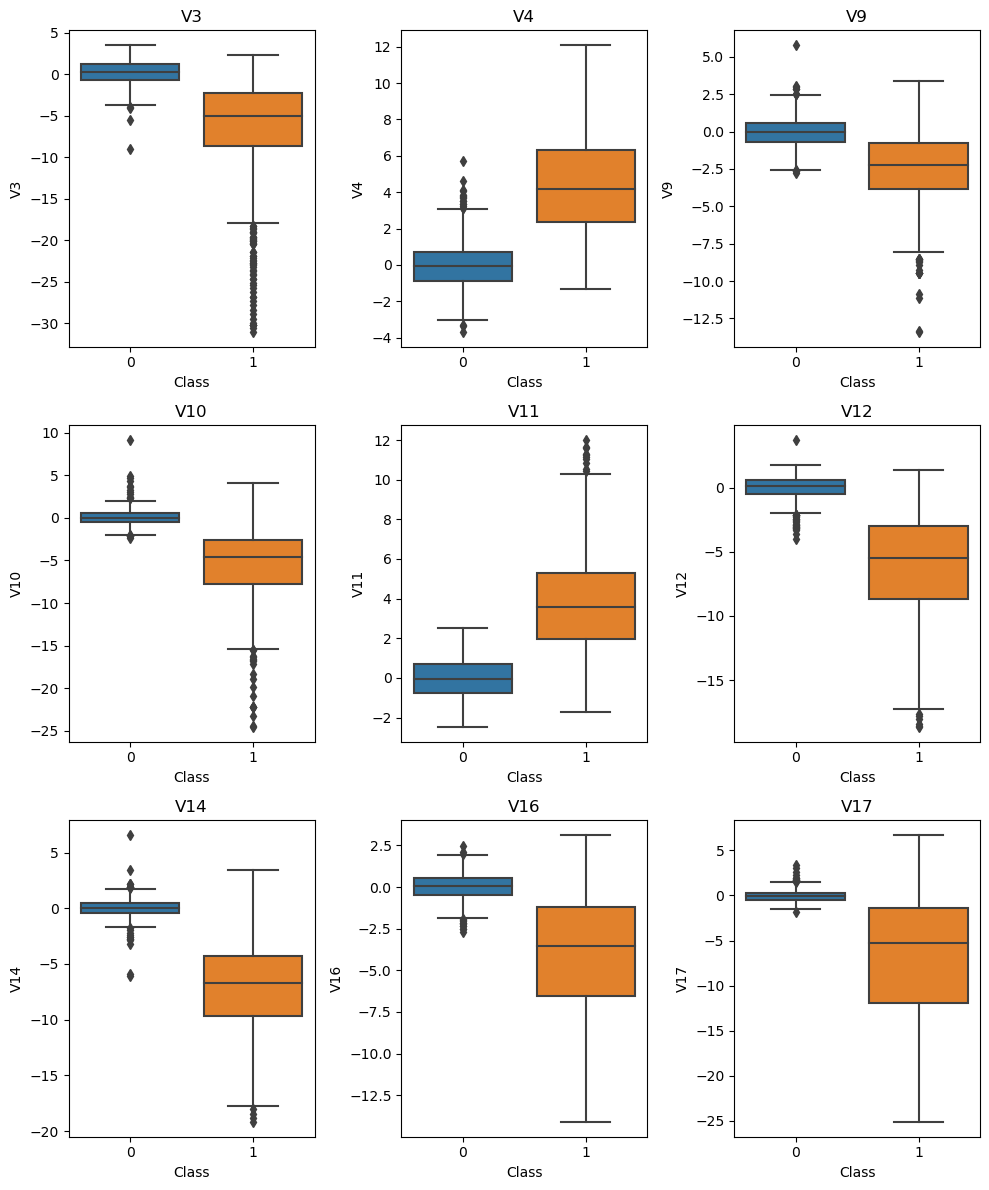

In [20]:
# Vẽ boxplot cho các thuộc tính đã chọn
boxplt(new_df,under_features)

In [21]:
# Xử lý outliers
new_df = outliers_negative_handler(new_df,under_features,under_corr,3)
new_df 

V10 Lower: -15.47046969983434
V10 Upper: 5.099587558797303
V10 outliers: [-16.6496281595399, -18.2711681738888, -15.5637913387301, -15.5637913387301, -16.7460441053944, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.1415136412892, -16.3035376590131, -16.2556117491401, -16.6011969664137, -18.9132433348732, -20.9491915543611, -19.836148851696, -23.2282548357516, -24.4031849699728, -24.5882624372475]
Số Outliers là giao dịch lừa đảo của thuộc tính V10 : 19
Dữ liệu sau khi loại bỏ Outliers: 964
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -16.922496886663865
V12 Upper: 5.633585132371216
V12 outliers: [-17.7691434633638, -17.6316063138707, -17.2286622386187, -17.1313009454468, -18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993, -17.1829184301947, -17.1829184301947, -17.003289445516, -17.0032894

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.282540,0.027033,-0.739167,1.488279,-0.859727,-0.929626,1.225151,-0.504375,0.997946,-0.193943,...,0.068869,-0.268908,-0.776601,0.083308,-0.087346,-0.942783,0.009797,-0.038153,0.389898,0
1,1.198491,-0.186880,-2.291870,-0.222693,2.019713,0.834219,0.007270,-0.126386,-0.095041,0.542176,...,-0.020731,0.175924,0.222475,-0.062408,-0.039041,0.411421,0.931766,-0.235431,-0.055730,0
2,-0.139733,-0.397021,1.623488,-0.726126,-0.498823,-1.543105,-0.627058,-0.848995,-0.397324,-0.425423,...,-0.256221,-0.217154,-0.165167,-0.195344,-0.417516,0.827869,-0.034659,0.002616,-0.000007,0
3,1.720394,0.452355,1.862448,-1.662344,-0.494652,-0.795631,-1.099814,0.663760,-1.281894,0.269525,...,0.258426,0.047800,-0.025188,0.163265,0.196552,-0.395267,-0.400485,0.002297,-0.025280,0
4,-0.296653,0.625560,-2.848811,2.927156,-2.616279,-1.515805,0.112150,-1.244598,0.308329,0.019736,...,0.151465,0.945935,0.501926,0.071920,-0.485071,0.025521,0.090622,0.234776,0.240161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,5.142178,0.992140,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
980,-0.296793,0.994549,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
981,0.780968,0.994596,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
982,3.116048,1.001821,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


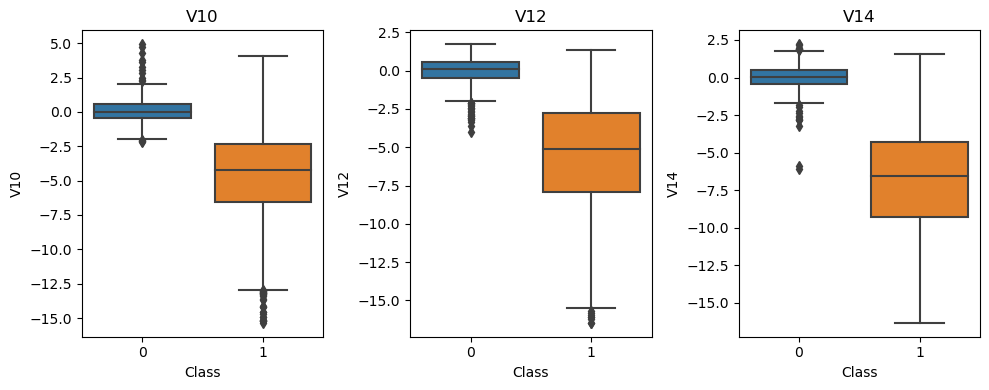

In [22]:
# Xem lại các thuộc tính sau khi xử lý outliers
boxplt(new_df,['V10','V12','V14'])

Nhận thấy 3 đặc trưng V10, V12, V14 có nhiều giá trị "ngoại lại cực đoan", nên sẽ được tiến hành loại bỏ các giá trị nhiễu đó. 

### 3.5. Giảm chiều dữ liệu

Trong phần này sẽ sử dùng phương pháp giảm chiều dữ liệu để có thể biến đổi tập đữ liệu về không gian hai chiều nhằm biểu diễn một cách trực quan. Thông qua đó phát hiện được những bất thường dữ liệu và nhận biết phân bố của cụm nhãn dữ liệu. Sử dụng phương pháp giảm chiều PCA và t-SNE. 

#### Chuẩn hóa dữ liệu

In [23]:

# tách biệt các thuộc tính
x_reduce = new_df.loc[:, under_features].values

# Tách biệt lớp
y_reduce = new_df.loc[:,['Class']].values

# Standardizing the features
x_reduced = StandardScaler().fit_transform(x_reduce)

#### PCA

In [24]:

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_reduced)

X_reduced_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [25]:
X_reduced_pca['Class'] = y_reduce

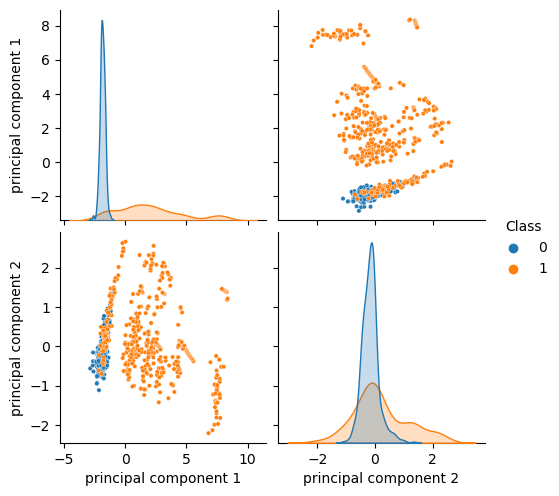

In [26]:
sns.pairplot(X_reduced_pca, hue='Class',plot_kws={'s': 10})

# Hiển thị biểu đồ
plt.show()

#### t-SNE

In [27]:
tsne = TSNE(n_components=2)

principalComponents = tsne.fit_transform(x_reduce)

X_reduced_tsne = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [28]:
X_reduced_tsne['Class'] = y_reduce

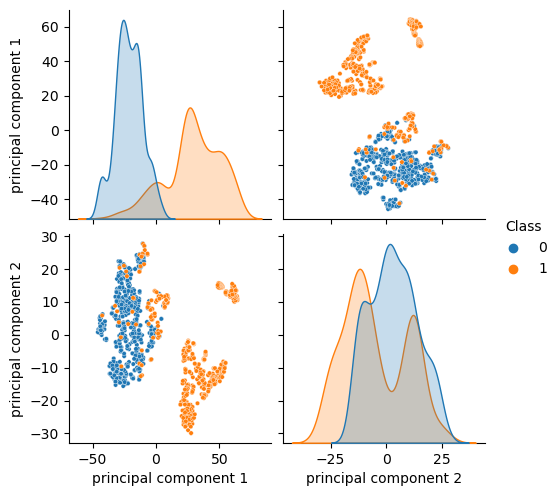

In [29]:
sns.pairplot(X_reduced_tsne, hue='Class',plot_kws={'s': 10})

# Hiển thị biểu đồ
plt.show()

Thuật toán t-SNE có thể phân cụm khá chính xác các trường hợp gian lận và không gian lận trong tập dữ liệu.  
Mặc dù mẫu khá nhỏ nhưng thuật toán t-SNE có thể phát hiện các cụm khá chính xác trong mọi tình huống như xáo trộn tập dữ liệu trước khi chạy t-SNE.  
=> Cho thấy, các mô hình phân loại sử dụng sẽ hoạt động khá tốt trong việc tách các trường hợp gian lận khỏi các trường hợp không gian lận.  

## 4. Chia dữ liệu thành tập train và test

Để đánh giá mô hình có bị OverFitting hay UnderFitting hay không ngoài việc lấy dữ liệu mẫu để huấn luyện mô hình thì chúng em còn lấy thêm một tập dữ liệu để kiểm thử và đánh giá hiệu suất mô hình

In [30]:
# Lấy các thuộc tính đã chọn cho tập dữ liệu huấn luyện
X_under = new_df[under_features]
y_under = new_df['Class']

In [31]:
# Scale dữ liệu
scale = StandardScaler()
scaled_X_under = scale.fit_transform(X_under)
print(scaled_X_under)

[[ 0.36656537 -0.9929014   0.78522902 ...  0.49528351  0.69283978
   0.54447313]
 [ 0.88686054 -0.39738322  0.22496004 ...  0.65072065  0.99694442
   0.37000434]
 [ 0.43177826 -1.20002724 -0.60228095 ...  0.68030684  0.37739555
   0.58155262]
 ...
 [ 0.12191168 -0.52092379  0.22158388 ... -0.18856223  0.05365173
  -0.39732902]
 [-0.4537824  -0.06554047 -0.27078853 ... -0.73124054 -0.24533166
  -0.32021496]
 [ 0.05510198 -0.5410592   0.83954874 ...  0.29634304  0.72410968
   0.6915016 ]]


In [32]:
X_under_scaled = pd.DataFrame(scaled_X_under)
X_under_scaled.columns = X_under.columns

In [33]:
# Phân chia bộ dữ liệu sử dụng cho việc huấn luyện
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under_scaled, y_under, test_size=0.3, random_state=180)

In [34]:
# Đưa các giá trị thành array để sử dụng cho thuật toán phân loại.
X_under_train = X_under_train.values
X_under_test = X_under_test.values
y_under_train = y_under_train.values
y_under_test = y_under_test.values

## 5. Lựa chọn và huấn luyện mô hình phân lớp

In [35]:
# Chuẩn bị các mô hình
classifiers = {
    "Logisitic_Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support_Vector_Classifier": SVC(probability=True),
    "Decision_Tree_Classifier": DecisionTreeClassifier()
}

In [36]:
# Tạo hàm tính cross validation score cho từng mô hình
def calc_cros_valid_score(X_train,y_train):
    results=[]
    names=[]
    for key, classifier in classifiers.items():
        kfold=model_selection.KFold(n_splits=10)
        cv_results=model_selection.cross_val_score(classifier,X_train,y_train,cv=kfold,scoring='precision')
        results.append(cv_results)
        names.append(key)
        msg="%s:%f(%f)"%(key,cv_results.mean(),cv_results.std())
        print(msg)
    return results,names

In [37]:
# Hàm vẽ boxplot để so sánh các thuật toán
def cross_valid_boxplot(results,names):
    fig = plt.figure(figsize=(14,4))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [38]:
results_under,names_under=calc_cros_valid_score(X_under_train,y_under_train)

Logisitic_Regression:0.989325(0.016395)
KNearest:0.979277(0.023868)
Support_Vector_Classifier:0.989325(0.016395)
Decision_Tree_Classifier:0.922257(0.050314)


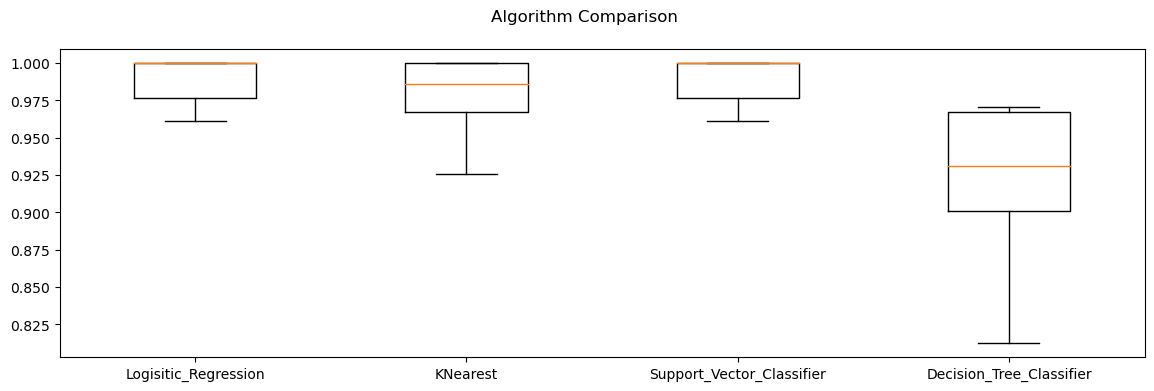

In [39]:
cross_valid_boxplot(results_under,names_under)

Nhận xét: Mô hình Support Vector Classifer và Logistic Regression có giá trị precision đánh giá tốt nhất

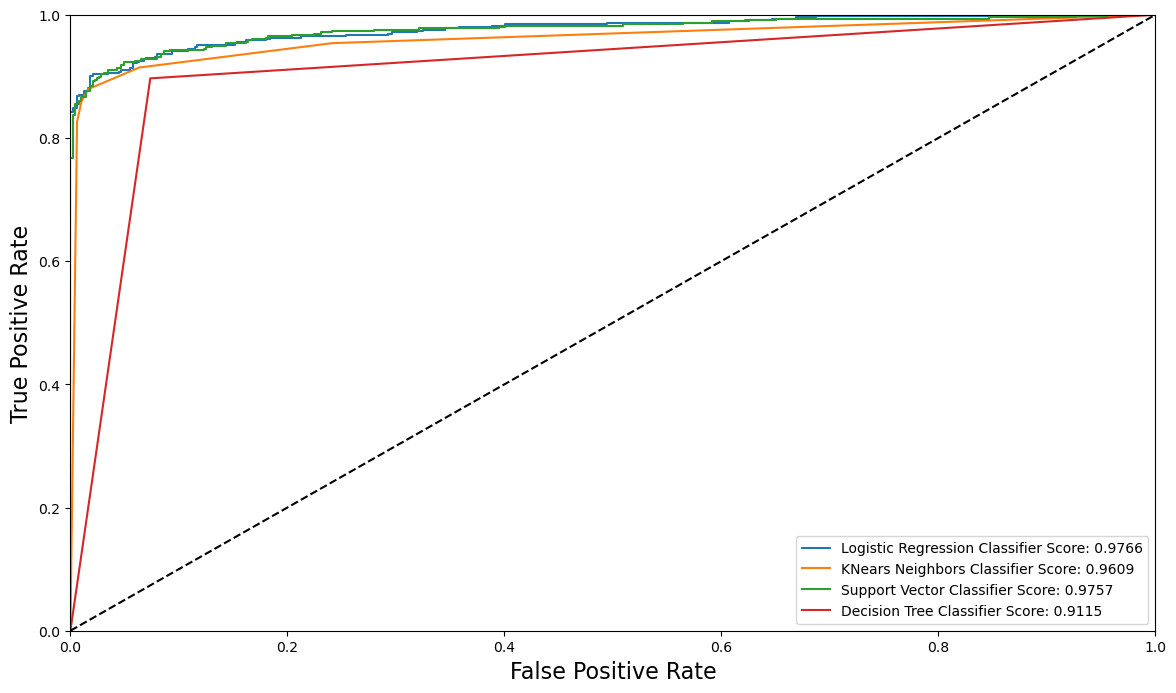

In [40]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_under_scaled,y_under)
y_score_lr = cross_val_predict(lr, X_under_scaled, y_under, method='decision_function',cv=10)
fpr, tpr, threshold = roc_curve(y_under,y_score= y_score_lr)

# Decision Tree
card = DecisionTreeClassifier()
card.fit(X_under_scaled,y_under)
y_score_card = cross_val_predict(card, X_under_scaled, y_under, method='predict_proba',cv=10)
fpr_card, tpr_card,threshold_card = roc_curve(y_under, y_score_card[:, 1])

# K Neighbor Classifier
knn = KNeighborsClassifier()
knn.fit(X_under_scaled,y_under)
knn_results = cross_val_score(knn,X_under_scaled,y_under,scoring='accuracy')
y_score_knn = cross_val_predict(knn,X_under_scaled,y_under,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_under,y_score_knn[:,1])

#SVC
svc = SVC()
svc.fit(X_under_scaled,y_under)
svc_under_results = cross_val_score(svc,X_under_scaled,y_under,scoring='accuracy')
y_score_svc = cross_val_predict(svc,X_under_scaled,y_under,cv=5,method="decision_function")
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_under,y_score_svc)

# ROC Curve cho các mô hình trên
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_under, y_score_lr)))
plt.plot(fpr_knn, tpr_knn,label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_under, y_score_knn[:, 1])))
plt.plot(fpr_svc, tpr_svc,label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_under, y_score_svc)))
plt.plot(fpr_card, tpr_card,label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_under, y_score_card[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

Nhận xét: Trong 4 thuật toán sử dụng, thuật toán Logistic Regression có chỉ số đánh giá tốt nhất. Nên sẽ lựa chọn thuật toán này để đánh giá các chỉ số hiệu suất cho mô hình.

## 6. Đánh giá mô hình của thuật toán được lựa chọn

Xây dựng các hàm để đánh giá mô hình

In [41]:
# Hàm vẽ Precision-Recall curve 
def prc_chart(y_holdout,y_score):
    average_precision = average_precision_score(y_holdout, y_score)
    fig = plt.figure(figsize=(12,6))

    precision, recall, _ = precision_recall_curve(y_holdout, y_score)

    plt.step(recall, precision, color='r', alpha=0.2,
            where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='#F59B00')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
            average_precision), fontsize=16)

In [42]:
# Hàm tính chỉ số hiệu suất mô hình
def performance(y_holdout,y_pred):
    acc=metrics.accuracy_score(y_holdout, y_pred) # accuracy
    pre=metrics.precision_score(y_holdout, y_pred) # precision
    rec=metrics.recall_score(y_holdout, y_pred) # recall
    f1=metrics.f1_score(y_holdout, y_pred) # f1 score
    print(f" Accuracy: {acc*100:.2f}\n",f'Precision: {pre*100:.2f}\n', f'Recall: {rec*100:.2f}\n',f'F1 :{f1*100:.2f}')

In [43]:
# Hàm vẽ Confusion matrix
def cm_chart(y,y_pred):
    sns.heatmap(metrics.confusion_matrix(y,y_pred), annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [44]:
y_under_pred = lr.predict(X_under_test)

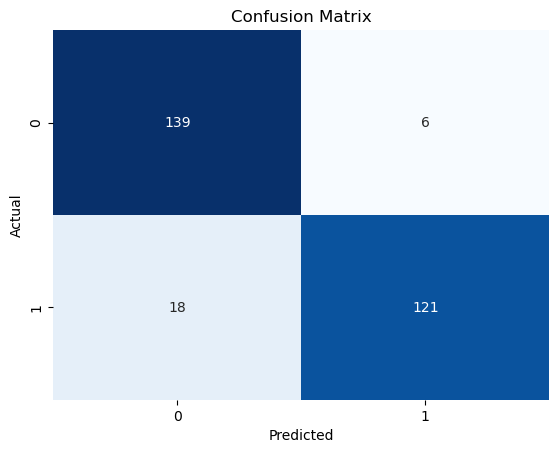

In [45]:
cm_chart(y_under_test,y_under_pred)

In [46]:
performance(y_under_test,y_under_pred)

 Accuracy: 91.55
 Precision: 95.28
 Recall: 87.05
 F1 :90.98


Toàn bộ các chỉ số cho thấy mô hình có tỷ lệ dự đoán rất tốt, độ dự đoán chính xác các trường hợp giao dịch gian lận và không gian lận là 0.91, dự đoán đúng các giao dịch gian lận trong tổng số các giao dịch gian lận thực tế là 0.87; và dự đoán đúng các giao dịch gian lận trong tổng số các giao dịch gian lận dự đoán là 0.95. Chỉ số F1-score cho mô hình là 0.9  


In [47]:
X = df[under_features]
y = df['Class']

In [48]:
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [49]:
y_ori_pred = lr.predict(original_Xtest)

y_ori_score = lr.decision_function(original_Xtest)

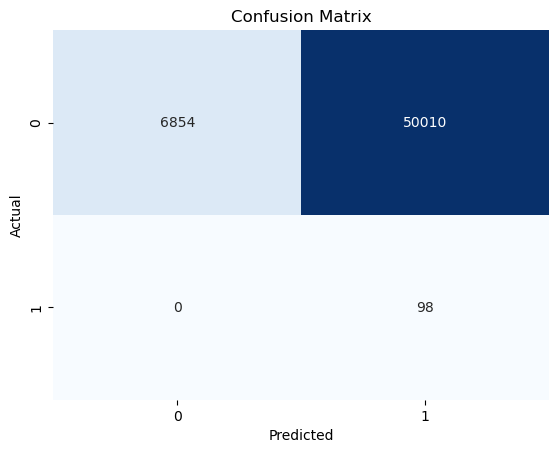

In [50]:
cm_chart(original_ytest,y_ori_pred)

In [51]:
performance(original_ytest,y_ori_pred)

 Accuracy: 12.20
 Precision: 0.20
 Recall: 100.00
 F1 :0.39


=> Sau khi xác thực chéo, ta thấy tỷ số dự đoán đúng các gian lận trong tổng số các gian lận thực tế là 1 - tức là dự đoán đúng hết tất cả các trường hợp gian lận; nhưng tỷ số precision là 0.002 - dự đoán đúng gian lận trong tổng số các gian lận dự đoán là rất nhỏ. Nghĩa là dự đoán rất nhiều các trường hợp thực tế không gian lận thành gian lận. Chỉ số F1 rất nhỏ cho thấy mô hình sẽ dự đoán không tốt trong thực tế.

=> Các chỉ số đánh giá cho thấy mô hình traning đang bị overfitting. 

# III. Sử dụng phương pháp để cải thiện mô hình

Mục đích sử dụng phương pháp lấy mẫu để xử lý khả năng mô hình bị overfitting nhưng mô hình bên trên vẫn gặp tình trạng overfitting.  
=> Lỗi xảy ra ở đây là việc thực hiện lấy mẫu và xác thực chéo sai cách.  Mô hình bị overfitting khi lấy mẫu trước rồi mới thực hiện xác thực chéo.
=> Cách thực hiện đúng là phải xác thực chéo đồng thời với việc lấy mẫu.  

Khi thực hiện phương pháp này, nhóm chúng em sẽ áp cho cả hai cách lấy mẫu là Under-Sampling và SMOTE luôn. Sau đó, sẽ so sánh xem phương pháp lấy mẫu nào thì có mô hình chạy tốt hơn.  

In [52]:
X = df[df.columns.drop('Class')]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [53]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [54]:
def score_model(model,sampling, cv=None):
    
    if cv is None:
        cv = KFold(n_splits=10, random_state=42)
    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Lấy dữ liệu huấn luyện
        X_train_fold, y_train_fold = X_train[train_fold_index], y_train[train_fold_index]
        # Lấy dữ liệu validation
        X_val_fold, y_val_fold = X_train[val_fold_index], y_train[val_fold_index]

        # Lấy mẫu dựa trên tập train
        X_train_fold_upsample, y_train_fold_upsample = sampling.fit_resample(X_train_fold,
                                                                           y_train_fold)
        # Fit mô hình với dữ liệu train đã lấy mẫu
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        # Tính điểm mô hình
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

## 1. Xây dựng mô hình với phương pháp xử lý mẫu Random UnderSampling

### 1.1. Huấn luyện mô hình mới (Chạy đồng thời UnderSampling và cross validation)

In [100]:
X_train_unsample, y_train_unsample = RandomUnderSampler(random_state=28).fit_resample(X_train, y_train)

In [56]:
# Khai báo báo mô hình
under_lr=LogisticRegression()
under_tree = DecisionTreeClassifier()
under_svc = SVC(probability=True)
under_knn = KNeighborsClassifier()

In [57]:
models = []
models.append(('LR',under_lr))
models.append(('TREE',under_tree))
models.append(('SVC',under_svc))
models.append(('KNN',under_knn))

In [101]:
results=[]
names=[]
for name,model in models:
    cv_results=score_model(model,RandomUnderSampler(random_state=42),cv=kf)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.909387(0.043316)
TREE:0.896960(0.054896)
SVC:0.880978(0.058279)
KNN:0.892394(0.047955)


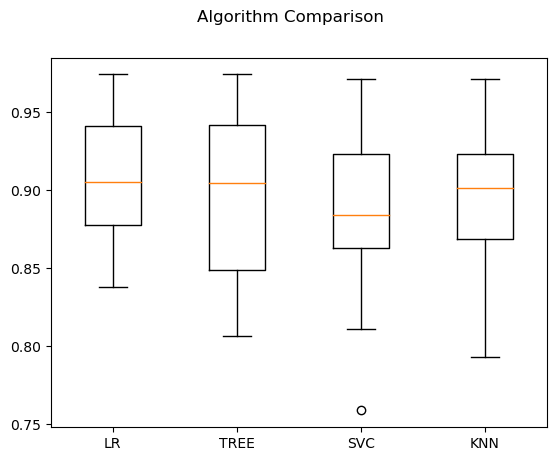

In [102]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

=> Nhận thấy thuật toán Logistic Regression có độ chính xác phân loại cao nhất

## 1.2. Đánh giá mô hình mới

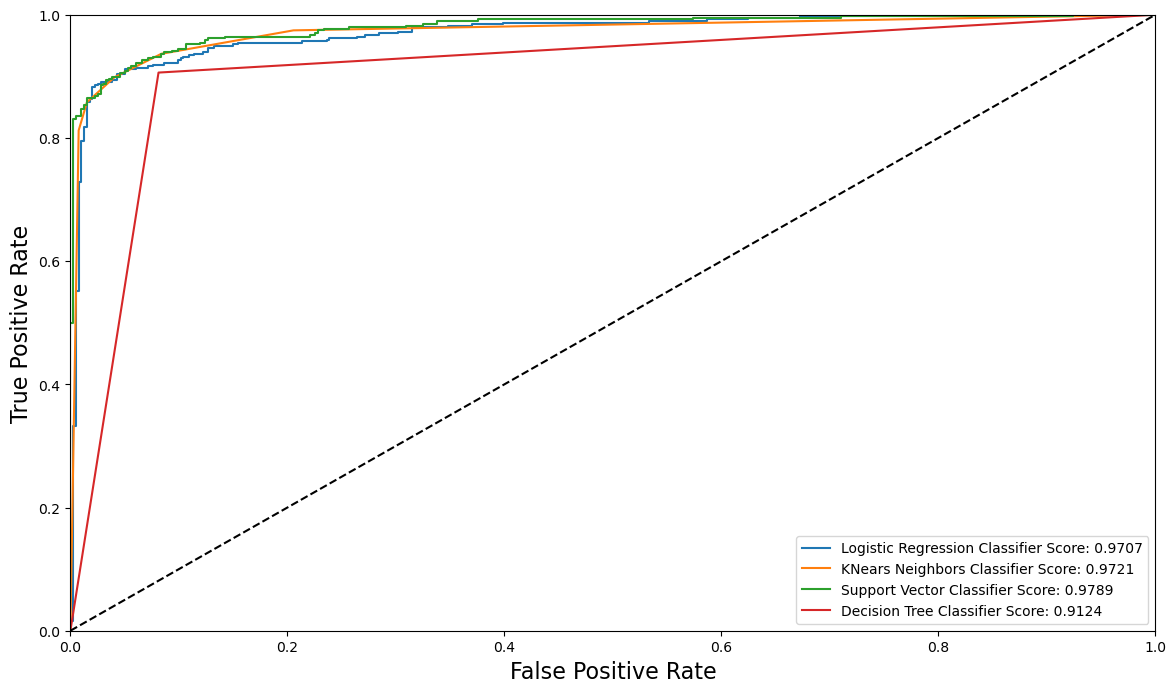

In [103]:
# Logistic Regression
under_lr.fit(X_train_unsample,y_train_unsample)
y_under_score_lr = cross_val_predict(under_lr, X_train_unsample, y_train_unsample, method='decision_function',cv=10)
under_fpr, under_tpr, under_threshold = roc_curve(y_train_unsample,y_under_score_lr)

# Decision Tree
under_tree.fit(X_train_unsample,y_train_unsample)
y_under_score_card = cross_val_predict(under_tree, X_train_unsample, y_train_unsample, method='predict_proba',cv=10)
under_fpr_card, under_tpr_card,under_threshold_card = roc_curve(y_train_unsample, y_under_score_card[:, 1])

# K Neighbor Classifier
under_knn.fit(X_train_unsample,y_train_unsample)
knn_results = cross_val_score(under_knn,X_train_unsample,y_train_unsample,scoring='accuracy')
y_under_score_knn = cross_val_predict(under_knn,X_train_unsample,y_train_unsample,method='predict_proba',cv=10)
under_fpr_knn, under_tpr_knn, under_threshold_knn = roc_curve(y_train_unsample,y_under_score_knn[:,1])

#SVC
under_svc.fit(X_train_unsample,y_train_unsample)
svc_under_results = cross_val_score(under_svc,X_train_unsample,y_train_unsample,scoring='accuracy')
y_under_score_svc = cross_val_predict(under_svc,X_train_unsample,y_train_unsample,cv=5,method="decision_function")
under_fpr_svc, under_tpr_svc, under_threshold_svc = roc_curve(y_train_unsample,y_under_score_svc)

# ROC Curve cho các mô hình trên
plt.figure(figsize=(14,8))
plt.plot(under_fpr,under_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train_unsample, y_under_score_lr)))
plt.plot(under_fpr_knn, under_tpr_knn,label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train_unsample, y_under_score_knn[:, 1])))
plt.plot(under_fpr_svc, under_tpr_svc,label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train_unsample, y_under_score_svc)))
plt.plot(under_fpr_card, under_tpr_card,label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train_unsample, y_under_score_card[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

Nhận xét: SVC và Logistic Regression có ROC lớn nhất

## 1.3. Đánh giá giá hiệu suất của thuật toán đã chọn

Do mô hình của thuật toán LR có độ chính xác cao, nên sẽ đánh giá cho mình hình xây dựng được từ thuật toán này.

In [61]:
under_lr.fit(X_train_unsample, y_train_unsample)

LogisticRegression()

In [62]:
y_under_pred = under_lr.predict(X_test)
y_under_pred_proba = under_lr.predict_proba(X_test)

In [63]:
y_under_score = under_lr.decision_function(X_test)

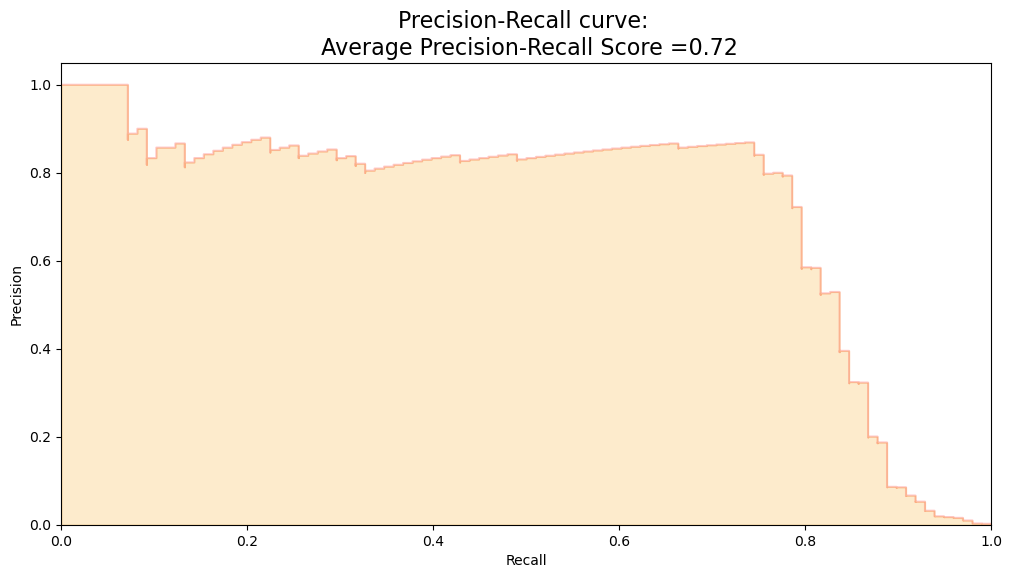

In [64]:
prc_chart(y_test,y_under_score)

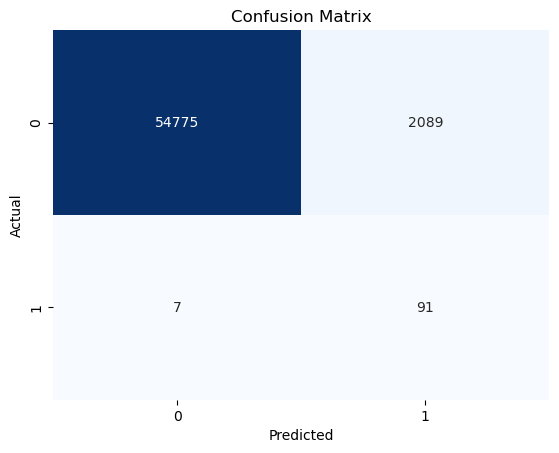

In [65]:
cm_chart(y_test,y_under_pred)

In [66]:
performance(y_test,y_under_pred)

 Accuracy: 96.32
 Precision: 4.17
 Recall: 92.86
 F1 :7.99


Các chỉ số đánh giá cho thấy tỷ lệ dự đoán chính xác trong tổng số các trường hợp giao dịch là 0.96. Tỷ lệ dự đoán đúng gian lận trong tổng số các trường hợp gian lận dự đoán là 0.04. Và tỷ lệ dự đoán đúng các trường hợp gian lận trong số các gian lận thực tế là 0.92; chỉ số F1 là 0.079  
=> Nhận thấy hiệu suất của mô hình đã được cải thiện.

## 2. Xây dựng mô hình với phương pháp xử lý mẫu SMOTE

### Random-Oversampling (SMOTE)
SMOTE tạo điểm dữ liệu mới để có sự cân bằng giữa các lớp bằng cách tăng các số lượng giao dịch gian lận lên sao cho bằng với số lượng giao dịch không gian lận. Đây là một giải pháp thay thế để giải quyết vấn đề dữ liệu mất cân bằng.  
Cách SMOTE hoạt động: chọn khoảng cách giữa những điểm dữ liệu lân cận gần nhất của nhóm dữ liệu ít hơn, ở giữa những khoảng cách này sẽ tạo ra các điểm dữ liệu tổng hợp.  
Mặc dù khả năng SMOTE sẽ dự đoán chính xác hơn nhưng sẽ mất nhiều thời gian hơn để huấn luyện vì số lượng dữ liệu đã tăng lên.

In [67]:
X = df[df.columns.drop('Class')]
y = df['Class']

In [68]:
su = SMOTE(random_state=42)
X_su, y_su = su.fit_resample(X, y)

In [69]:
y_su

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [70]:
over_df = X_su.copy()
over_df['Class'] = y_su.loc[X_su.index]

In [71]:
over_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,9.854633,0.638100,-2.356885,1.759518,-6.388271,1.791556,-3.461029,1.440556,-0.373200,1.446709,...,0.188948,0.855687,0.618928,0.954478,-0.615495,-1.709122,0.107490,1.124115,0.405976,1
568626,1.110878,-0.236643,-3.352917,0.753401,-1.698278,0.863169,-1.186314,-0.406322,-1.652498,0.020940,...,-0.371572,0.342796,0.454379,-0.130009,-0.499223,-0.042935,0.987288,-1.389017,0.750979,1
568627,0.313366,0.510075,1.015969,1.435963,-3.709889,2.784929,-0.214184,-1.435874,-1.600511,0.319123,...,0.288674,0.523091,0.374095,-0.176358,-0.434731,0.450034,-0.275049,0.488280,0.241260,1
568628,2.558090,0.519992,-2.297717,2.980660,-5.140960,2.602508,-1.445263,-0.677400,-1.801274,1.636259,...,-0.070069,0.600670,0.688650,-0.002084,0.160731,0.023995,-0.401783,0.549772,0.097347,1


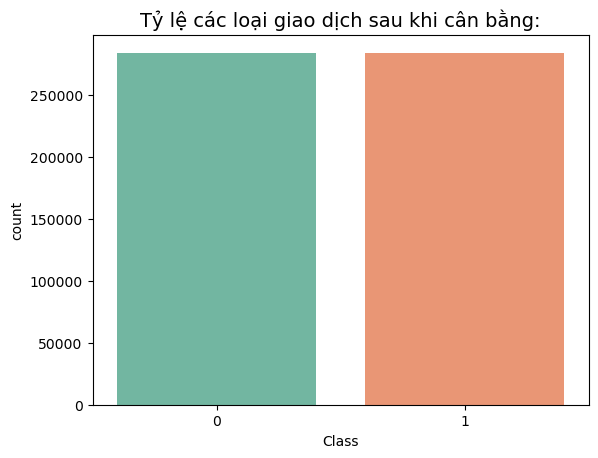

In [72]:
# Trực quan
sns.countplot(x='Class',data = over_df, palette='Set2')
plt.title('Tỷ lệ các loại giao dịch sau khi cân bằng:', fontsize=14)
plt.show()

### 2.1. Huấn luyện mô hình

In [73]:
X_train_ovsample, y_train_ovsample = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [74]:
over_lr=LogisticRegression()

In [75]:
score_model(over_lr,SMOTE(random_state=42),cv=kf)

array([0.97142857, 0.86206897, 0.78378378, 0.9       , 0.97435897,
       0.87096774, 0.90196078, 0.94871795, 0.94871795, 0.90909091])

In [76]:
over_lr.fit(X_train_ovsample,y_train_ovsample)

LogisticRegression()

### 2.2. Đánh giá mô hình mới

In [77]:
y_over_score_lr = cross_val_predict(over_lr,X_train_ovsample,y_train_ovsample,cv=5,method="decision_function")
over_fpr_svc, over_tpr_svc, over_threshold_lr = roc_curve(y_train_ovsample,y_over_score_lr)
y_over_pred = over_lr.predict(X_test)
y_over_pred_proba = over_lr.predict_proba(X_test)

In [78]:
y_over_score = over_lr.decision_function(X_test)

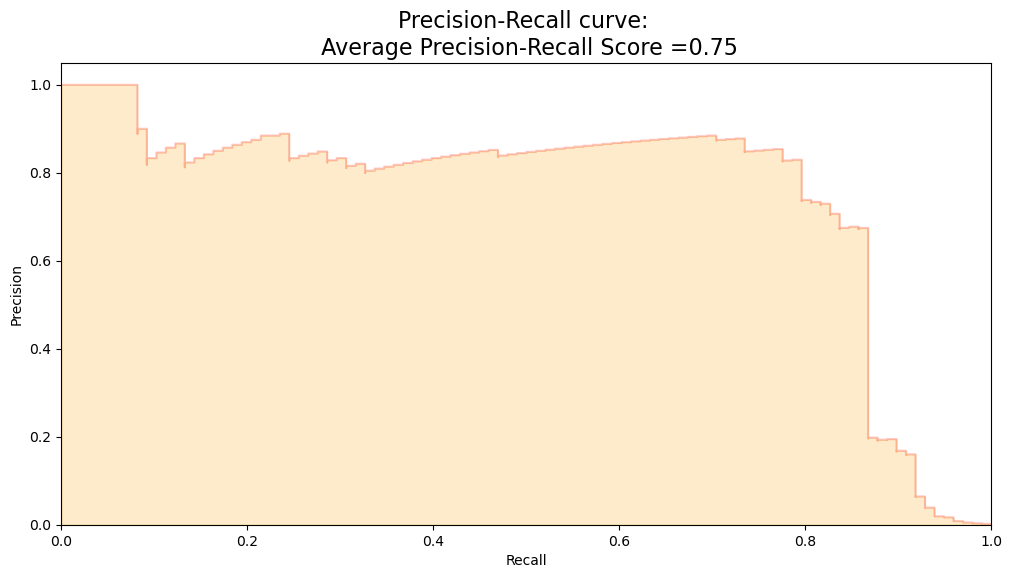

In [79]:
prc_chart(y_test,y_over_score)

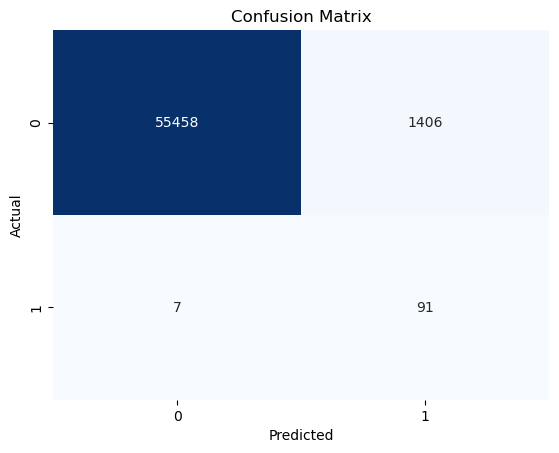

In [80]:
cm_chart(y_test,y_over_pred)

In [81]:
performance(y_test,y_over_pred)

 Accuracy: 97.52
 Precision: 6.08
 Recall: 92.86
 F1 :11.41


Các chỉ số đánh giá cho thấy tỷ lệ dự đoán chính xác trong tổng số các trường hợp giao dịch là 0.97. Tỷ lệ dự đoán đúng gian lận trong tổng số các trường hợp gian lận dự đoán là 0.06. Và tỷ lệ dự đoán đúng các trường hợp gian lận trong số các gian lận thực tế là 0.92; chỉ số F1 là 0.011  
=> Nhận thấy hiệu suất của mô hình đã được cải thiện hơn.

## 3. So sánh hai phương pháp lấy mẫu

Trong phần này, nhóm em sẽ triển khai một Mạng nơ-ron một lớp ẩn, để đánh giá xem mô hình nào trong hai mô hình hồi quy logistic mà nhóm đã triển khai với hai phương pháp lấy mẫu Under Sampling và SMOTE sẽ có độ chính xác cao hơn trong việc phát hiện gian lận.   
Mục tiêu là xem liệu mô hình có thể dự đoán cả trường hợp không gian lận và gian lận hay không. Vì nếu chỉ tập trung vào giao dịch gian lận thì trong trường hợp khách hàng bị khóa thẻ vì thuật toán cho rằng giao dịch mua hàng là gian lận trong khi các giao dịch đó không gian lận, gây ra các trải nghiệm dịch vụ không tốt cho khách hàng.

In [82]:
n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [83]:
undersample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
undersample_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
7292/7292 - 13s - 2ms/step - accuracy: 0.9980 - loss: 0.0090 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 2/20
7292/7292 - 11s - 1ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 3/20
7292/7292 - 11s - 2ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 4/20
7292/7292 - 11s - 2ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 5/20
7292/7292 - 12s - 2ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 6/20
7292/7292 - 11s - 2ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 7/20
7292/7292 - 11s - 2ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 8/20
7292/7292 - 21s - 3ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9993 - val_loss: 0.0029
Epoch 9/20
7292/7292 - 11s - 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 

In [86]:
undersample_predictions = undersample_model.predict(X_test, batch_size=200, verbose=0)

In [87]:
def score_under_model(model, cv=None):
    
    if cv is None:
        cv = KFold(n_splits=10, random_state=42)

    underer = RandomUnderSampler(random_state=42)
    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Lấy dữ liệu huấn luyện
        X_train_fold, y_train_fold = X_train[train_fold_index], y_train[train_fold_index]
        # Lấy dữ liệu validation 
        X_val_fold, y_val_fold = X_train[val_fold_index], y_train[val_fold_index]

        # tăng mấu với mỗi bộ dữ liệu training
        X_train_fold_upsample, y_train_fold_upsample = underer.fit_resample(X_train_fold,
                                                                           y_train_fold)
        # Fit dữ liệu tăng mẫu với mô hình
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        # tính điểm mô hình với dữ liệu validation
        score = precision_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

In [88]:

undersample_fraud_predictions = np.argmax(undersample_predictions,axis=1)

In [89]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[56856     8]
 [   27    71]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


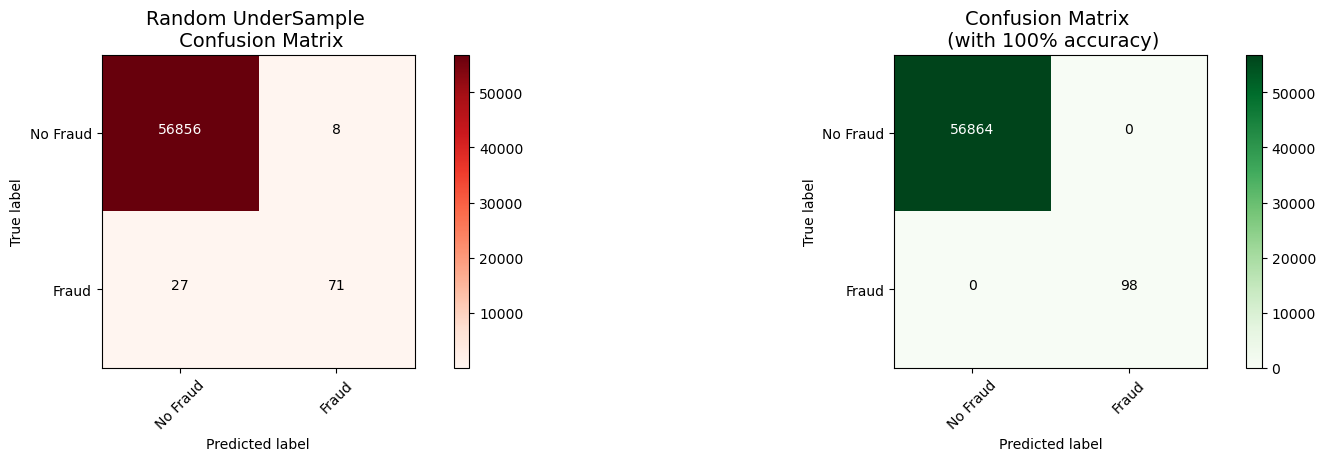

In [90]:
undersample_cm = metrics.confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = metrics.confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

Với phương pháp lấy mẫu Under Sampling:  
+ mô hình dự đoán đúng 56 931 trong tổng số 56962 giao dịch -> giá trị accuracy là 0.99  
+ nhận thấy trong tổng số 98 giao dịch gian lận mô hình dự đoán được 74 gian lận, tỷ lệ recall là 0.75  
+ mô hình dự đoán đúng 74 giao dịch lận trong tổng số 81 giao dịch dự đoán gian lận -> tỷ số precision là 0.91  
+ chỉ số F1 tính được là 0.82  
=> tỷ lệ dự đoán đúng của mô hình đã tăng lên tới 99%, các trường hợp dự đoán sai không gian lận thành gian lận đã giảm đáng kể nhưng việc bắt được giao dịch gian lận cũng chỉ ở mức tương đối khoảng 75%.

In [91]:
n_inputs = X_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')])

In [92]:
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
oversample_model.fit(X_train, y_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
608/608 - 3s - 5ms/step - accuracy: 0.9844 - loss: 0.0451 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 2/20
608/608 - 1s - 2ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 3/20
608/608 - 1s - 2ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 4/20
608/608 - 1s - 2ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 5/20
608/608 - 1s - 2ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 6/20
608/608 - 1s - 2ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 7/20
608/608 - 1s - 2ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 8/20
608/608 - 1s - 2ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 9/20
608/608 - 1s - 2ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9994 - val_loss: 0.0027
E

In [94]:
oversample_predictions = oversample_model.predict(X_test, batch_size=200, verbose=0)

In [95]:
oversample_fraud_predictions = np.argmax(oversample_predictions,axis=1)

Confusion matrix, without normalization
[[56857     7]
 [   21    77]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


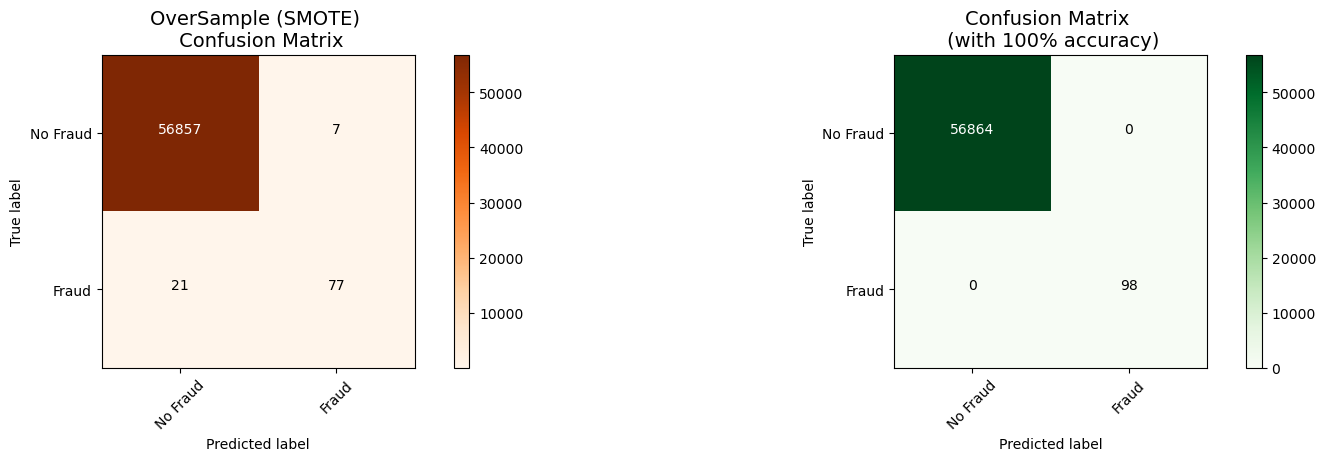

In [96]:
oversample_smote = metrics.confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = metrics.confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

Với phương pháp lấy mẫu SMOTE:

+ mô hình dự đoán đúng 56 855 trong tổng số 56962 giao dịch -> giá trị accuracy là 0.99
+ nhận thấy trong tổng số 98 giao dịch gian lận mô hình dự đoán được 75 gian lận, tỷ lệ recall là 0.76
+ mô hình dự đoán đúng 75 giao dịch lận trong tổng số 84 giao dịch dự đoán gian lận -> tỷ số precision là 0.89
+ chỉ số F1 tính được là 0.82
=> tỷ lệ dự đoán đúng của mô hình đã tăng lên tới 99%, các trường hợp dự đoán sai không gian lận thành gian lận đã giảm đáng kể nhưng việc bắt được giao dịch gian lận là 76%, tăng 1% so với phương pháp Under Sampling. Tuy nhiên, sẽ đánh đổi bằng việc các giao dịch không gian lận bị dự đoán thành gian lận sẽ tăng lên.  
=> Điều đó cho thấy khi tỷ lệ dự đoán đúng các trường hợp gian lận tăng thì tỷ lệ các trường hợp dự đoán không gian lận thành gian lận cũng tăng.

Nhận xét: Nhận thấy, mô hình dự đoán được xây dựng trên tập dữ liệu lấy mẫu SMOTE dự đoán đúng được các giao dịch gian lận hơn mô hình được xây dựng trên tập dữ liệu lấy mẫu Random Under Sampling. Với sự đánh đổi bằng việc tăng tỷ lệ dự đoán sai các giao dịch không gian lận thành gian lận.